In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [15]:
import warnings
warnings.filterwarnings("ignore")

### This Script involved Data pre-processing & Data Analysis Segments.

In [16]:
propert_da=pd.read_csv('tax_file1.csv')
print(propert_da.shape)
propert_da.head(2)

(2200000, 20)


,Unnamed: 0,property_info,address,property_type,owner_name,property_id,address_num_list,floors,house_no,colony_name,ward,zone,mcd_name,owner_type,receipt_no,property_id.1,fin_year,pay_mode,date,amount_paid
0,1,247147318400|Telephone Colony|Vivek Vihar Ward...,186|186 Chota Thakur Dwara Teliwara Shahdara D...,Residential Plotted,Raj Kumar,247147318400,186|186,NaN,186,Telephone Colony,Vivek Vihar,Sh. South,Eastdelhi,ind_owner,NaN,247147318400,2008-09,Na,NaN,NaN
1,1,247147318400|Telephone Colony|Vivek Vihar Ward...,186|186 Chota Thakur Dwara Teliwara Shahdara D...,Residential Plotted,Raj Kumar,247147318400,186|186,NaN,186,Telephone Colony,Vivek Vihar,Sh. South,Eastdelhi,ind_owner,NaN,247147318400,2009-10,Na,NaN,NaN


### Deep Copy of Database 
(Modifications to the data or indices of the copy will not be reflected in the original object)

In [24]:
property_data= propert_da.copy(deep=True)

In [25]:
property_data.shape

(2200000, 20)

### a:) If Dataset is Consisting duplicate Rows so removing those rows

In [26]:
property_data.drop_duplicates( keep='first',inplace=True) 
property_data.shape

(2200000, 20)

### b:) Checking for null values

In [27]:
property_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2200000 entries, 0 to 2199999
Data columns (total 20 columns):
Unnamed: 0          int64
property_info       object
address             object
property_type       object
owner_name          object
property_id         int64
address_num_list    object
floors              object
house_no            object
colony_name         object
ward                object
zone                object
mcd_name            object
owner_type          object
receipt_no          float64
property_id.1       int64
fin_year            object
pay_mode            object
date                object
amount_paid         float64
dtypes: float64(2), int64(3), object(15)
memory usage: 352.5+ MB


In [28]:
# Dropping unncesery columns which will have no relevence for Data analysis on This DataSet

property_data=property_data.drop(['property_id','address','owner_name','floors','Unnamed: 0','receipt_no'
                                  ,'property_id.1','address_num_list','house_no'],axis=1)

In [29]:
property_data.shape

(2200000, 11)

###  * Handling NULL values

In [30]:
property_data.isnull().sum()

property_info          0
property_type        948
colony_name            0
ward              761844
zone              761844
mcd_name               0
owner_type             0
fin_year               0
pay_mode               0
date             1740650
amount_paid      1740457
dtype: int64

In [87]:
#  What kind of Property is this :
property_data['property_type'].fillna("Empty_space_or_no_information", inplace = True) 

In [88]:
# Total number of Numerical values in address
property_data['amount_paid'].fillna("00",inplace=True)

In [89]:
property_data['date'].fillna("00",inplace=True)

In [90]:
property_data.isnull().sum()

property_info         0
property_type         0
colony_name           0
ward             761844
zone             761844
mcd_name              0
owner_type            0
fin_year              0
pay_mode              0
date                  0
amount_paid           0
dtype: int64

In [27]:
property_data.head(2)

,property_info,property_type,colony_name,ward,zone,mcd_name,owner_type,fin_year,pay_mode,date,amount_paid
0,247147318400|Telephone Colony|Vivek Vihar Ward...,Residential Plotted,Telephone Colony,Vivek Vihar,Sh. South,Eastdelhi,ind_owner,2008-09,Na,00,00
1,247147318400|Telephone Colony|Vivek Vihar Ward...,Residential Plotted,Telephone Colony,Vivek Vihar,Sh. South,Eastdelhi,ind_owner,2009-10,Na,00,00


* Now Filling Ward Values to Ward Columns becasue In ward Column a large amount of Values are having " Ward" Values which is having no significance
* Appending the values from Colony Name adding ward at the end

In [91]:
# creating new dataframe and spliting property_info Column and assigning its values to dataframe
df=[]
ward_new=property_data['property_info']
print(type(ward_new))
df=pd.DataFrame(df,columns=['First','Last','ward','zone'])
df[['First','Last','ward','zone']] = ward_new.str.split("|", n = 4, expand = True)
df.shape

<class 'pandas.core.series.Series'>


(2200000, 4)

In [92]:
property_data['zone']=df['zone'].values
property_data['ward']=df['ward'].values
property_data['ward'].value_counts()[:5]

 Ward                 327647
Pahar Ganj Ward       156932
Rohtas Nagar Ward     133004
Chandni chowk Ward    126005
Mandawali Ward        122212
Name: ward, dtype: int64

In [93]:
ward = property_data[property_data['ward'] == ' Ward']
ward['ward'] = ward['colony_name'] + ward['ward']

In [94]:
ward['ward'].value_counts()

Chandni Chowk Ward                            286183
Derawal Nagar Ward                             29966
Kamla Market Ward                               4213
Sameypur Village Ward                           2016
GH-13,Paschim Vihar Ward                        1272
GH-14,Paschim Vihar Ward                         888
Azad Nagar(Kishan Ganj) Ward                     805
Katra Asharfi Ward                               684
Ratan Nagar Ward                                 648
Sheesh Mahal Ward                                276
Priyadarshini Ward                               228
Railway Colony|Qtrs Nangloi Extension Ward       132
Aman Puri, Najafgarh Road Ward                   108
Malka Gunj Ward                                   96
Bharat vihar Begum Pur Extn Ward                  72
Katra Dhobl Ward                                  48
Katra Husain Bax Ward                             12
Name: ward, dtype: int64

In [95]:
ward['zone'].value_counts()

                    291512
Civil Lines Zone     32210
Rohini Zone           2472
Karol Bagh Zone       1453
Name: zone, dtype: int64

In [96]:
ward.head()

,property_info,property_type,colony_name,ward,zone,mcd_name,owner_type,fin_year,pay_mode,date,amount_paid
1728,086208100278|Chandni Chowk| Ward|,Commercial General,Chandni Chowk,Chandni Chowk Ward,,Northdelhi,ind_owner,2008-09,Na,00,00
1729,086208100278|Chandni Chowk| Ward|,Commercial General,Chandni Chowk,Chandni Chowk Ward,,Northdelhi,ind_owner,2009-10,Na,00,00
1730,086208100278|Chandni Chowk| Ward|,Commercial General,Chandni Chowk,Chandni Chowk Ward,,Northdelhi,ind_owner,2010-11,Na,00,00
1731,086208100278|Chandni Chowk| Ward|,Commercial General,Chandni Chowk,Chandni Chowk Ward,,Northdelhi,ind_owner,2011-12,Na,00,00
1732,086208100278|Chandni Chowk| Ward|,Commercial General,Chandni Chowk,Chandni Chowk Ward,,Northdelhi,ind_owner,2012-13,Na,00,00


In [97]:
ward['ward'].shape

(327647,)

In [98]:
property_data['ward'].value_counts()

 Ward                        327647
Pahar Ganj Ward              156932
Rohtas Nagar Ward            133004
Chandni chowk Ward           126005
Mandawali Ward               122212
                              ...  
Dallupra Ward                    36
Vasant Kunj Ward                 36
Pooth Khurd Ward                 12
Kirari Suleman Nagar Ward        12
Kanwar Singh Nagar Ward          12
Name: ward, Length: 124, dtype: int64

In [99]:
property_data['zone'].eq('').value_counts()

False    1806911
True      393089
Name: zone, dtype: int64

In [100]:
property_data['zone'].value_counts()

                    393089
Karol Bagh Zone     307831
Sh. South Zone      300326
Civil Lines Zone    190845
West Zone           188214
Sh. North Zone      187362
South Zone          178936
Central Zone        129698
City - S P Zone     129366
Najafgarh Zone       82959
Keshavpuram Zone     62893
Narela Zone          25052
Rohini Zone          23429
Name: zone, dtype: int64

In [101]:
property_data.loc[property_data['ward']==' Ward']['ward'].shape

(327647,)

In [102]:
property_data['zone'].eq('').sum()

393089

In [103]:
property_data.loc[property_data['zone']=='']['zone'].shape

(393089,)

In [104]:
new_ward = ward['colony_name'] + ward['ward']

In [105]:
new_zone = ward['colony_name'] + ward['zone']

In [106]:
new_zone.shape

(327647,)

In [107]:
new_ward.shape

(327647,)

In [108]:
property_data.loc[property_data['ward']==' Ward','ward'] = new_ward

In [115]:
property_data.loc[property_data['zone']=='','zone'] = new_zone

In [116]:
property_data.isnull().sum()

property_info         0
property_type         0
colony_name           0
ward                  0
zone             101577
mcd_name              0
owner_type            0
fin_year              0
pay_mode              0
date                  0
amount_paid           0
dtype: int64

In [114]:
property_data['zone'].value_counts()[:10]

Karol Bagh Zone     307831
Sh. South Zone      300326
Chandni Chowk       286183
Civil Lines Zone    190845
West Zone           188214
Sh. North Zone      187362
South Zone          178936
Central Zone        129698
City - S P Zone     129366
Najafgarh Zone       82959
Name: zone, dtype: int64

In [117]:
property_data['ward'].value_counts()[:10]

Chandni ChowkChandni Chowk Ward    286183
Pahar Ganj Ward                    156932
Rohtas Nagar Ward                  133004
Chandni chowk Ward                 126005
Mandawali Ward                     122212
Dev Nagar Ward                      99695
Kishan Garh Ward                    88052
Tilak Nagar Ward                    71886
Kamla Nagar Ward                    71460
Raghubarpura Ward                   68600
Name: ward, dtype: int64

In [118]:
property_data.shape

(2200000, 11)

In [119]:
property_data.head(2)

,property_info,property_type,colony_name,ward,zone,mcd_name,owner_type,fin_year,pay_mode,date,amount_paid
0,247147318400|Telephone Colony|Vivek Vihar Ward...,Residential Plotted,Telephone Colony,Vivek Vihar Ward,Sh. South Zone,Eastdelhi,ind_owner,2008-09,Na,00,00
1,247147318400|Telephone Colony|Vivek Vihar Ward...,Residential Plotted,Telephone Colony,Vivek Vihar Ward,Sh. South Zone,Eastdelhi,ind_owner,2009-10,Na,00,00


In [120]:
property_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200000 entries, 0 to 2199999
Data columns (total 11 columns):
property_info    object
property_type    object
colony_name      object
ward             object
zone             object
mcd_name         object
owner_type       object
fin_year         object
pay_mode         object
date             object
amount_paid      object
dtypes: object(11)
memory usage: 184.6+ MB


In [128]:
property_data['ward']=property_data['ward'].replace(to_replace ="Chandni chowkchandni chowk ward"
                                                    , value ="chandni chowk ward") 

In [129]:
property_data['ward']=property_data['ward'].str.capitalize() 

In [123]:
property_data.head(2)

,property_info,property_type,colony_name,ward,zone,mcd_name,owner_type,fin_year,pay_mode,date,amount_paid
0,247147318400|Telephone Colony|Vivek Vihar Ward...,Residential Plotted,Telephone Colony,Vivek vihar ward,Sh. South Zone,Eastdelhi,ind_owner,2008-09,Na,00,00
1,247147318400|Telephone Colony|Vivek Vihar Ward...,Residential Plotted,Telephone Colony,Vivek vihar ward,Sh. South Zone,Eastdelhi,ind_owner,2009-10,Na,00,00


In [124]:
property_data.isnull().sum()

property_info         0
property_type         0
colony_name           0
ward                  0
zone             101577
mcd_name              0
owner_type            0
fin_year              0
pay_mode              0
date                  0
amount_paid           0
dtype: int64

### c:) Creating more usefull DataFrame for analysis

In [125]:
property_data=property_data.drop(['property_info'],axis=1)

In [126]:
property_data.head(5)

,property_type,colony_name,ward,zone,mcd_name,owner_type,fin_year,pay_mode,date,amount_paid
0,Residential Plotted,Telephone Colony,Vivek vihar ward,Sh. South Zone,Eastdelhi,ind_owner,2008-09,Na,00,00
1,Residential Plotted,Telephone Colony,Vivek vihar ward,Sh. South Zone,Eastdelhi,ind_owner,2009-10,Na,00,00
2,Residential Plotted,Telephone Colony,Vivek vihar ward,Sh. South Zone,Eastdelhi,ind_owner,2010-11,Na,00,00
3,Residential Plotted,Telephone Colony,Vivek vihar ward,Sh. South Zone,Eastdelhi,ind_owner,2011-12,Na,00,00
4,Residential Plotted,Telephone Colony,Vivek vihar ward,Sh. South Zone,Eastdelhi,ind_owner,2012-13,Na,00,00


In [130]:
property_data['ward'].value_counts()[:10]

Chandni chowk ward    412188
Pahar ganj ward       156932
Rohtas nagar ward     133004
Mandawali ward        122212
Dev nagar ward         99695
Kishan garh ward       88052
Tilak nagar ward       71886
Kamla nagar ward       71460
Raghubarpura ward      68600
Mohan garden ward      63932
Name: ward, dtype: int64

In [131]:
property_data.to_csv('/home/abhishek/Desktop/tealwork/data_analysis/file_updated.csv', header=True, index=False)

### Final DataFrame & NULL values

In [43]:
property_data.isnull().sum()

property_type    0
colony_name      0
ward             0
zone             0
mcd_name         0
owner_type       0
fin_year         0
pay_mode         0
date             0
amount_paid      0
dtype: int64

### d:) Inforamtion of DataFrame (Types, total columns) 

In [44]:
property_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2200000 entries, 0 to 2199999
Data columns (total 10 columns):
property_type    object
colony_name      object
ward             object
zone             object
mcd_name         object
owner_type       object
fin_year         object
pay_mode         object
date             object
amount_paid      object
dtypes: object(10)
memory usage: 184.6+ MB


# Data Visualization & Data Analysis is Done on Tableau :-)

### Types of Properties in Delhi NCR

In [53]:
print(len(property_data['property_type'].unique().tolist()))

31


### How many types of properties we have in Delhi NCR

In [54]:
property_data['property_type'].value_counts()

Residential Plotted                                                                                 1437446
Commercial General                                                                                   315157
Residential DDA Flats                                                                                192955
Shops                                                                                                117893
Residential Group Housing                                                                             40957
Industrial Plotted                                                                                    18361
Residential DDA Janta Flats                                                                           15353
Local Shopping Center                                                                                 10057
Hotel/Restaurants                                                                                      9120
Farm House                  

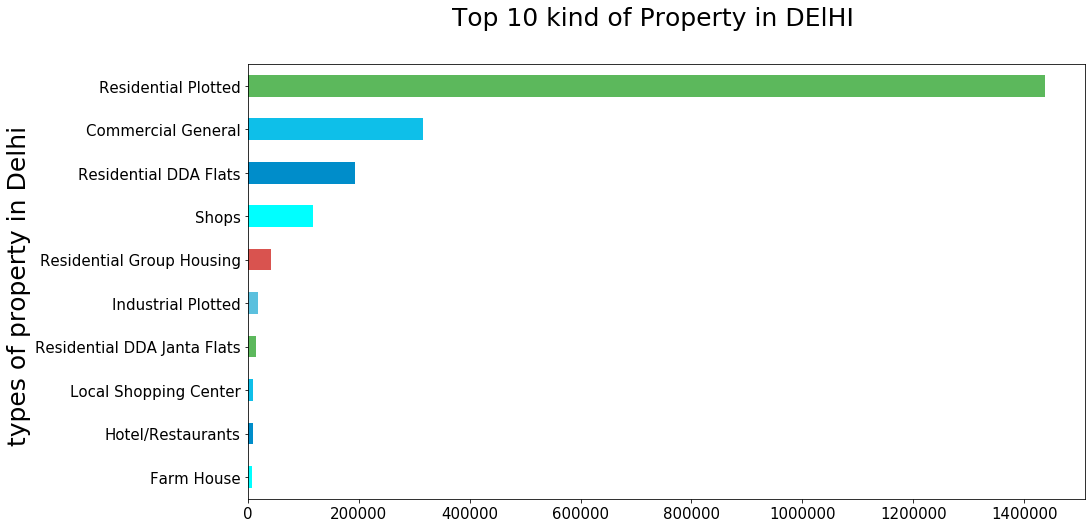

In [84]:
plt.figure(figsize=(15,8))
plt.suptitle('Top 10 kind of Property in DElHI', fontsize=25)
plt.ylabel('types of property in Delhi ',fontsize=25)
color_list= ['cyan', '#008DCA', '#0EBFE9','#5cb85c','#5bc0de','#d9534f']
plt.tick_params(axis='both', which='major', colors='black', labelsize=15)
property_data['property_type'].value_counts()[:10].sort_values().plot(kind="barh",color=color_list)

In [83]:
# plt.figure(figsize=(12,12))
# plt.suptitle('Types of Property in DElHI', fontsize=25)
# property_data['property_type'].value_counts()[:7].plot(kind='pie', 
#                                                        autopct='%1.0f%%', pctdistance=1.1, labeldistance=1.2)
# plt.axis('off')                                                   

### Each Type of Property is paying How much money:

In [64]:
property_data['amount_paid'].groupby(property_data['property_type']).describe()

,count,mean,std,min,25%,50%,75%,max
property_type,,,,,,,,
Agricultural,3924.0,2320.017839,12730.114927,0.0,0.0,0.0,0.00,227375.0
Air Conditioned Gyms,108.0,764.342593,4563.263421,0.0,0.0,0.0,0.00,31145.0
Banquet Halls,600.0,10519.951667,86243.183273,0.0,0.0,0.0,0.00,887295.0
Big /super/special Commercial property with covered Area of 1500sq. ft.(139.5 sq.mtr.) and above,132.0,9059.136364,25287.912169,0.0,0.0,0.0,0.00,103076.0
Coaching Centres,456.0,5313.186404,14971.903220,0.0,0.0,0.0,0.00,103517.0
Commercial General,315157.0,1481.216647,10985.446088,0.0,0.0,0.0,0.00,1466080.0
Community Center,4034.0,6182.633651,22569.414257,0.0,0.0,0.0,0.00,200263.0
Convenient Shopping Center,1850.0,1929.690989,9535.856517,0.0,0.0,0.0,898.00,164334.0
District Center,1056.0,568.844773,8165.994912,0.0,0.0,0.0,0.00,168148.0


### Tortal Colonies in Delhi NCR

In [31]:
print(len(property_data['colony_name'].unique().tolist()))

184


### Top 25 entries in Colonies Column

In [44]:
property_data['colony_name'].value_counts()[:25]

Chandni Chowk                          34348
Tilak Nagar                            15456
Najafgarh Extn.                        13994
Pahar Ganj                             13333
Vinod Nagar                            10238
Sagar Pur Main and West                 9345
Bhajanpura                              8424
Rehgarpura                              8394
Vasant Kunj (Kishangarh) D-1 to D-6     7490
Rohtash Nagar                           7463
Shakti Nagar                            5980
Mohan Garden (Uttam Nagar)              5842
Mansarovar Garden                       5838
Raghubarpura                            5780
Hauz Qazi                               5566
Jasola Vihar                            5550
Vivek Vihar Ph - I                      4510
Mahaveer Encl Part I                    4209
Anand Vihar                             4204
Shakarpur                               4107
Derawal Nagar                           3955
Navin Shahdra                           3779
Balbir Nag

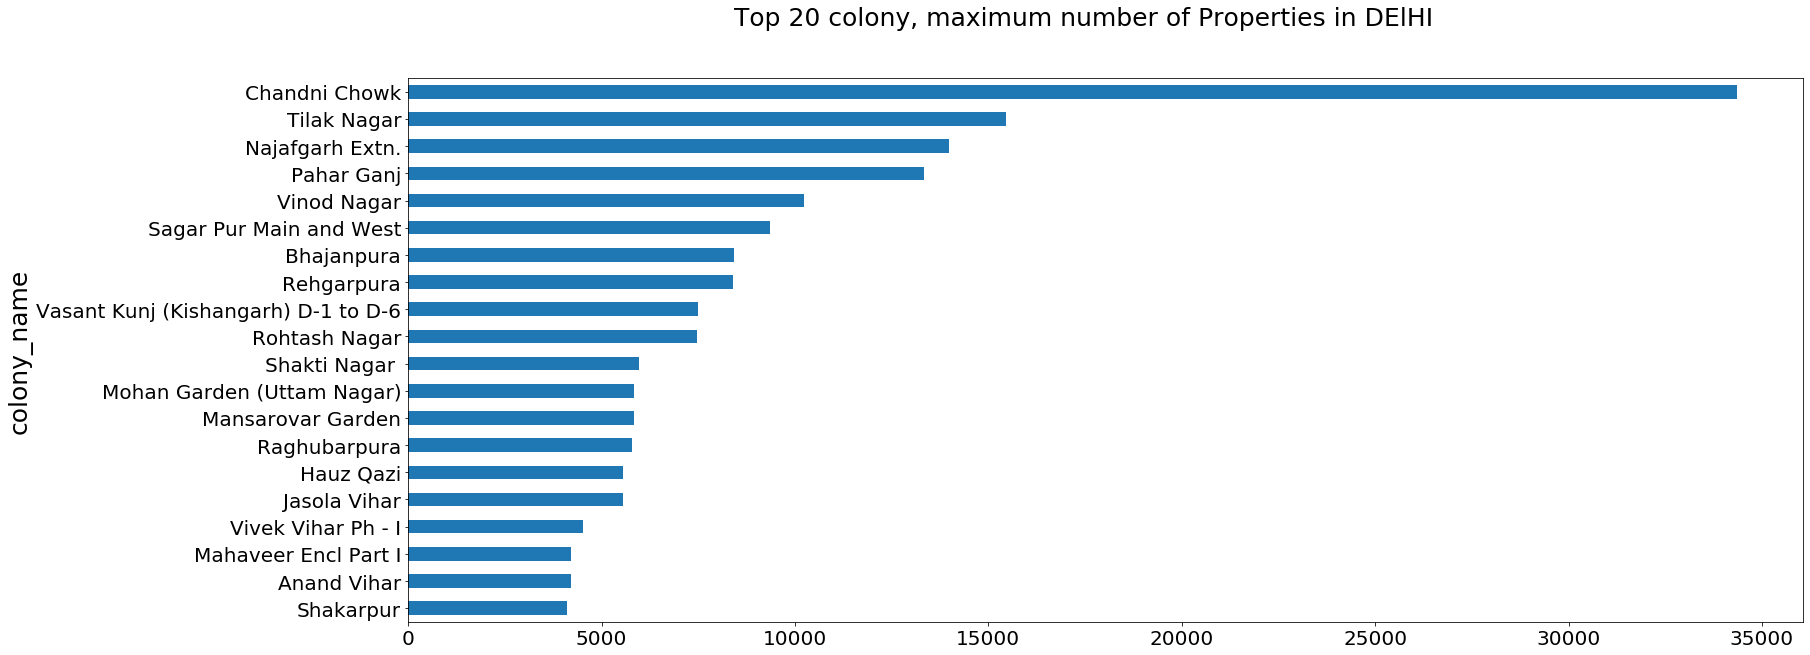

In [48]:
plt.figure(figsize=(25,10))
plt.suptitle('Top 20 colony, maximum number of Properties in DElHI', fontsize=25)
plt.ylabel('colony_name',fontsize=25)
plt.tick_params(axis='both', which='major', colors='black', labelsize=20)
property_data['colony_name'].value_counts()[:20].sort_values().plot(kind='barh')

(-1.25, 1.25, -1.25, 1.25)

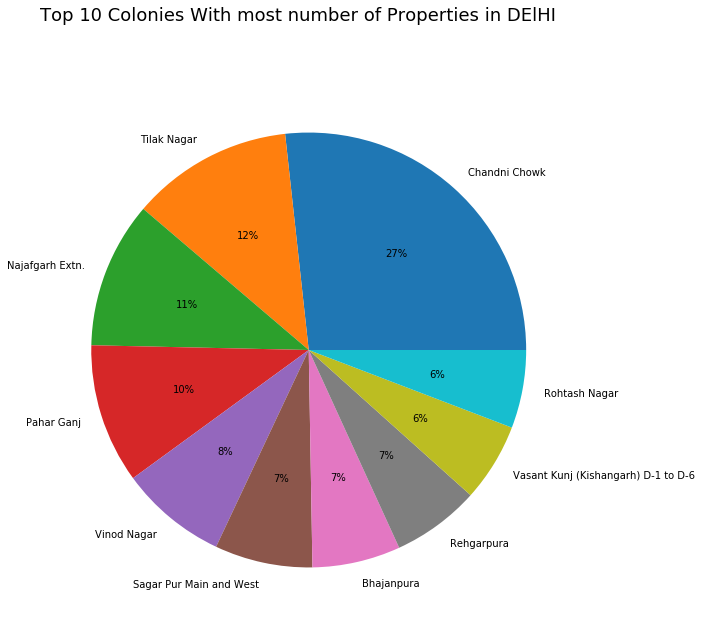

In [49]:
plt.figure(figsize=(12,10))
plt.suptitle('Top 10 Colonies With most number of Properties in DElHI', fontsize=18)
property_data['colony_name'].value_counts()[:10].plot(kind='pie',autopct='%1.0f%%')
plt.axis('off')                                                   

### Total Wards in Delhi NCR

In [50]:
print(len(property_data['ward'].unique().tolist()))

191


### Top 20 ward with maximum number of Properties

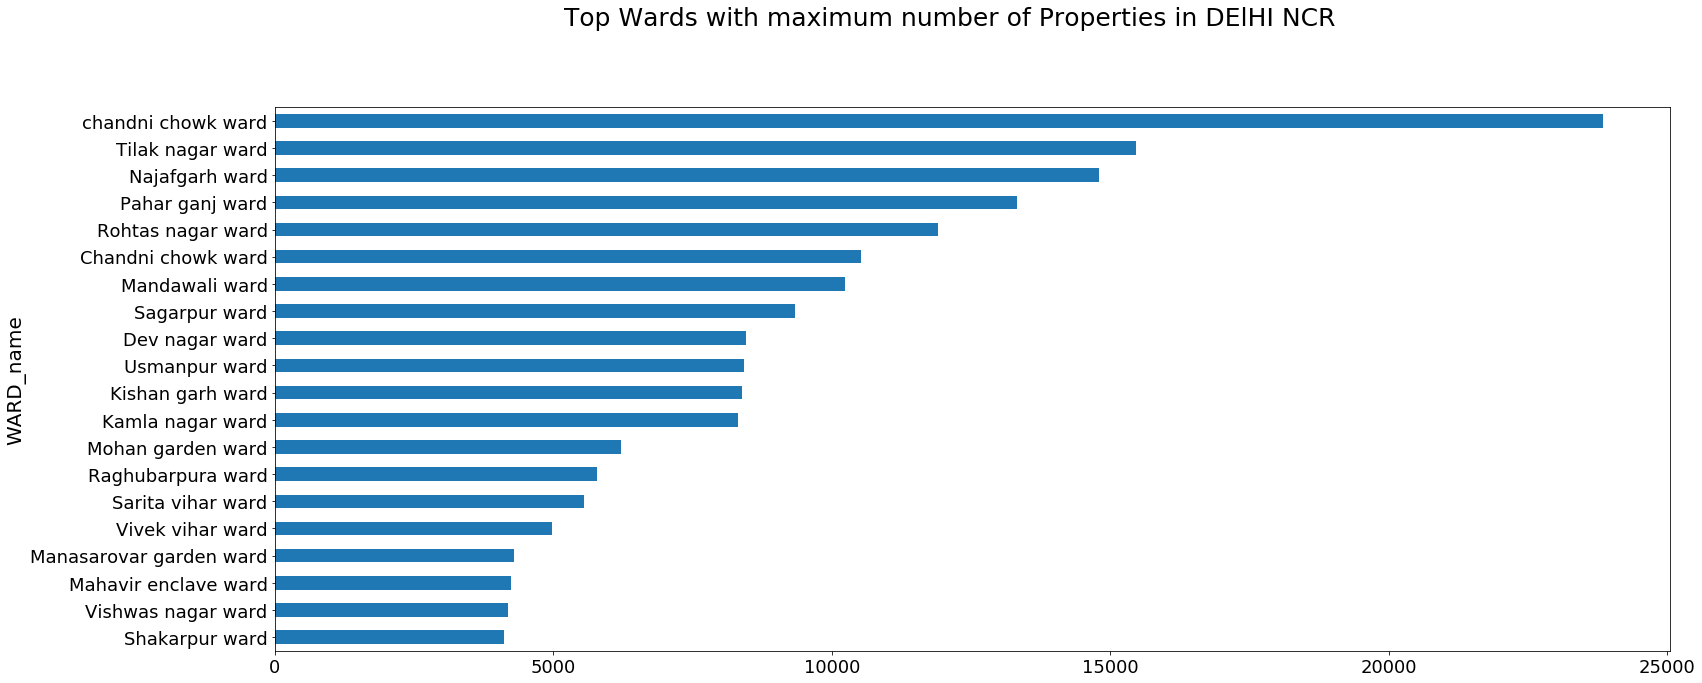

In [78]:
plt.figure(figsize=(25,10))
plt.suptitle('Top Wards with maximum number of Properties in DElHI NCR', fontsize=25, y=1.02)
plt.ylabel('WARD_name',fontsize=20)
plt.tick_params(axis='both', which='major', colors='black', labelsize=18)
property_data['ward'].value_counts()[:20].sort_values().plot(kind='barh')

(-1.25, 1.25, -1.25, 1.25)

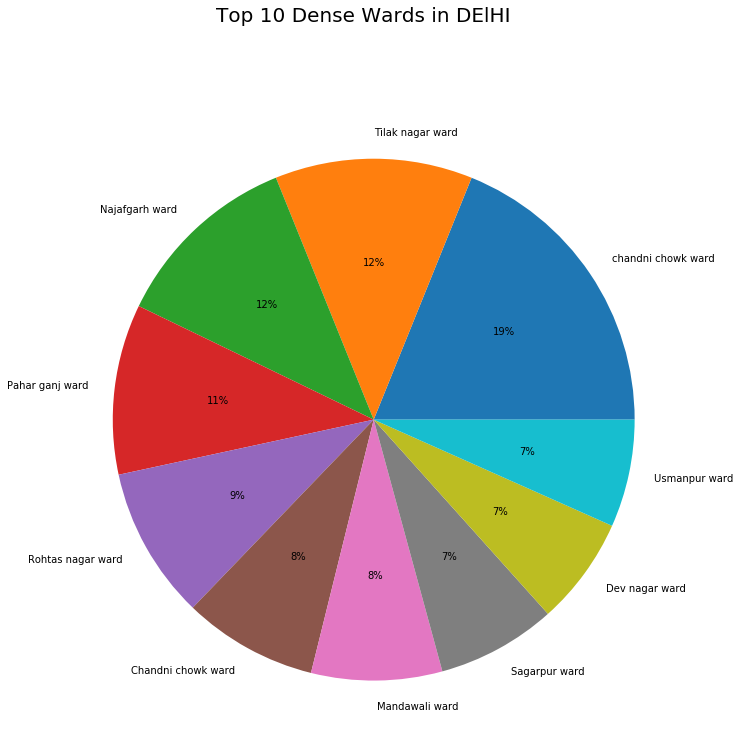

In [79]:
plt.figure(figsize=(12,12))
plt.suptitle('Top 10 Dense Wards in DElHI', fontsize=20)
property_data['ward'].value_counts()[:10].plot(kind='pie',autopct='%1.0f%%')
plt.axis('off')                                                   

### Total Zones in Delhi NCR

In [81]:
print(len(property_data['zone'].unique().tolist()))

13


### Number of Properties in Each Zone

In [82]:
property_data['zone'].value_counts()

Sh. South Zone      39090
                    37219
Najafgarh Zone      33201
West Zone           31791
Sh. North Zone      30876
Karol Bagh Zone     29013
South Zone          22839
Civil Lines Zone    21443
Central Zone        16475
City - S P Zone     13437
Keshavpuram Zone     8450
Rohini Zone          3718
Narela Zone          2448
Name: zone, dtype: int64

### In Delhi, Top 10 zones who owns maximum number of Properties 

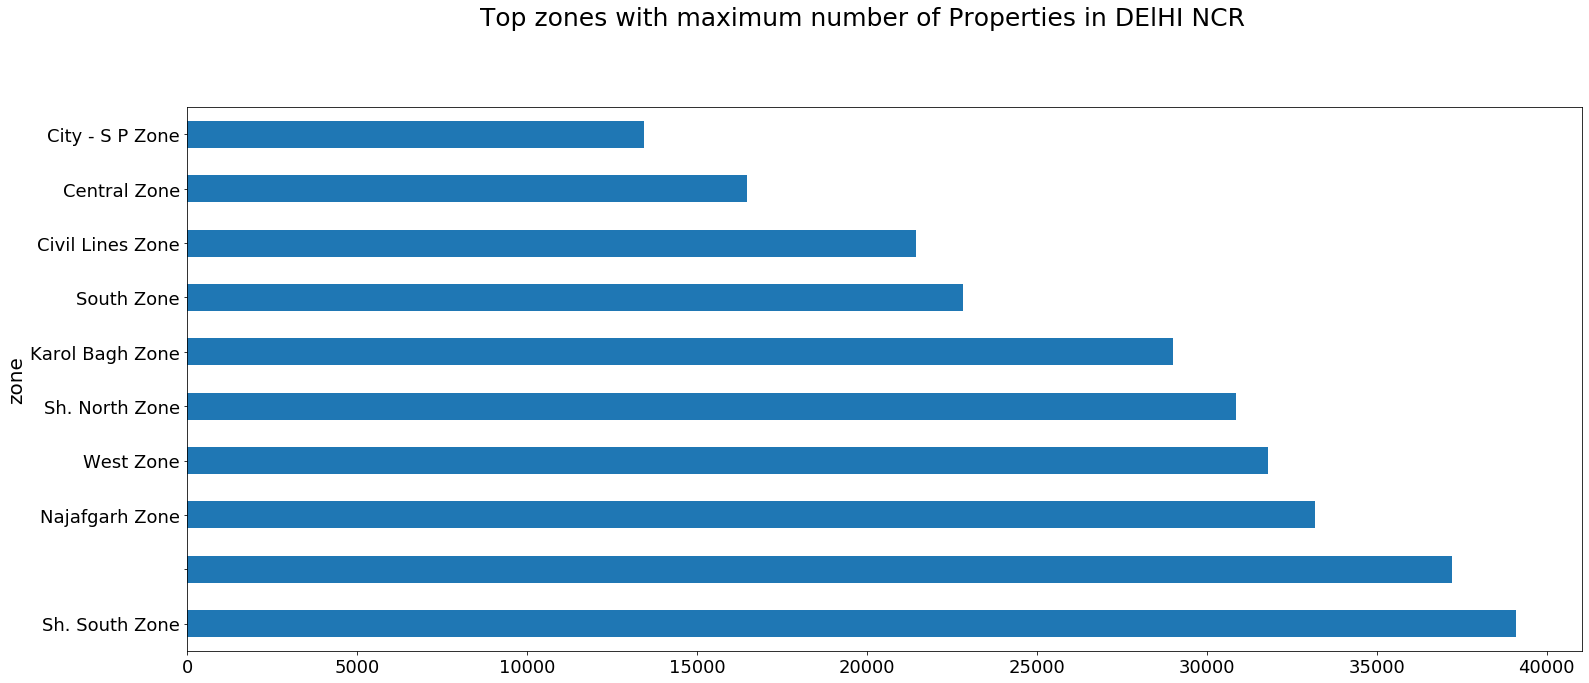

In [121]:
plt.figure(figsize=(25,10))
plt.suptitle('Top zones with maximum number of Properties in DElHI NCR', fontsize=25, y=1.02)
plt.ylabel('zone',fontsize=20)
plt.tick_params(axis='both', which='major', colors='black', labelsize=18)
property_data['zone'].value_counts()[:10].plot(kind='barh')

### Total MCD's in Delhi NCR

In [84]:
print(len(property_data['mcd_name'].unique().tolist()))

3


###  Number of properties Owns by Each MCD's in Delhi NCR 

In [85]:
property_data['mcd_name'].value_counts()

Northdelhi    115728
Southdelhi    104306
Eastdelhi      69966
Name: mcd_name, dtype: int64

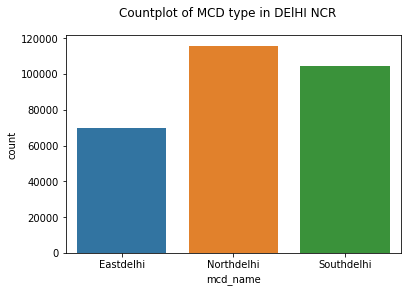

In [86]:
plt.suptitle('Countplot of MCD type in DElHI NCR', fontsize=12)
plt.xlabel('Owner_type',fontsize=10)
plt.tick_params(axis='both', which='major', colors='black', labelsize=10)
sns.countplot(x="mcd_name",data=property_data)

### How many type of Owner we have in Delhi & their shares

In [87]:
print(len(property_data['owner_type'].unique().tolist()))

2


In [88]:
property_data['owner_type'].value_counts()

ind_owner    285133
ent_owner      4867
Name: owner_type, dtype: int64

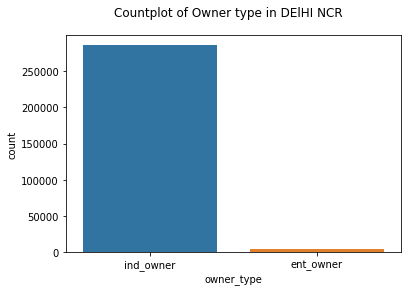

In [89]:
plt.suptitle('Countplot of Owner type in DElHI NCR', fontsize=12)
plt.xlabel('Owner_type',fontsize=10)
plt.tick_params(axis='both', which='major', colors='black', labelsize=10)
sns.countplot(x="owner_type",data=property_data)

In [91]:
group_by_carrier.size()

ward                                                     zone            
Adarsh nagar ward                                        Civil Lines Zone      209
Ajmeri gate ward                                         City - S P Zone      2377
Alipur ward                                              Narela Zone            48
Aman puri, najafgarh roadaman puri, najafgarh road ward  Rohini Zone             9
Amar colony ward                                         Central Zone         3538
                                                                             ...  
Vivek vihar ward                                         Sh. South Zone       4978
West gorakh park ward                                    Sh. North Zone       1228
West patel nagar ward                                    Karol Bagh Zone       326
West vinod nagar ward                                    Sh. South Zone         78
chandni chowk ward                                                           23849
Length: 202, 

# "SECOND TABLE"

In [92]:
propert_ta=pd.read_csv('file1.csv')
propert_ta.head(2)

,receipt_no,prop_id,fin_year,pay_mode,date,amount_paid
0,NaN,147746111050,2008-09,Na,NaN,NaN
1,NaN,147746111050,2009-10,Na,NaN,NaN


In [93]:
property_tax= propert_ta.copy(deep=True)
property_tax.head()

,receipt_no,prop_id,fin_year,pay_mode,date,amount_paid
0,NaN,147746111050,2008-09,Na,NaN,NaN
1,NaN,147746111050,2009-10,Na,NaN,NaN
2,NaN,147746111050,2010-11,Na,NaN,NaN
3,NaN,147746111050,2011-12,Na,NaN,NaN
4,NaN,147746111050,2012-13,Na,NaN,NaN


###  Shape of the DataSet

In [94]:
property_tax[fin_year].shape

(290000, 6)

In [95]:
property_tax.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290000 entries, 0 to 289999
Data columns (total 6 columns):
receipt_no     61143 non-null float64
prop_id        290000 non-null int64
fin_year       290000 non-null object
pay_mode       290000 non-null object
date           61137 non-null object
amount_paid    61143 non-null float64
dtypes: float64(2), int64(1), object(3)
memory usage: 13.3+ MB


In [96]:
property_tax.isnull().sum()[:20]

receipt_no     228857
prop_id             0
fin_year            0
pay_mode            0
date           228863
amount_paid    228857
dtype: int64